# Clustering

## **Types of Clustering**
- Flat
    - K-Means
- Hierarchical __[The Dendrogram Explained](https://www.youtube.com/watch?v=ijUMKMC4f9I)__
    - Agglomerative (Bottom-up)
    - Divisive (Top-Down)

## Agglomerative-Dengrogram
- The distance between the links shows similarity between observations
- Choice of number of cluster: Draw a horizontal line

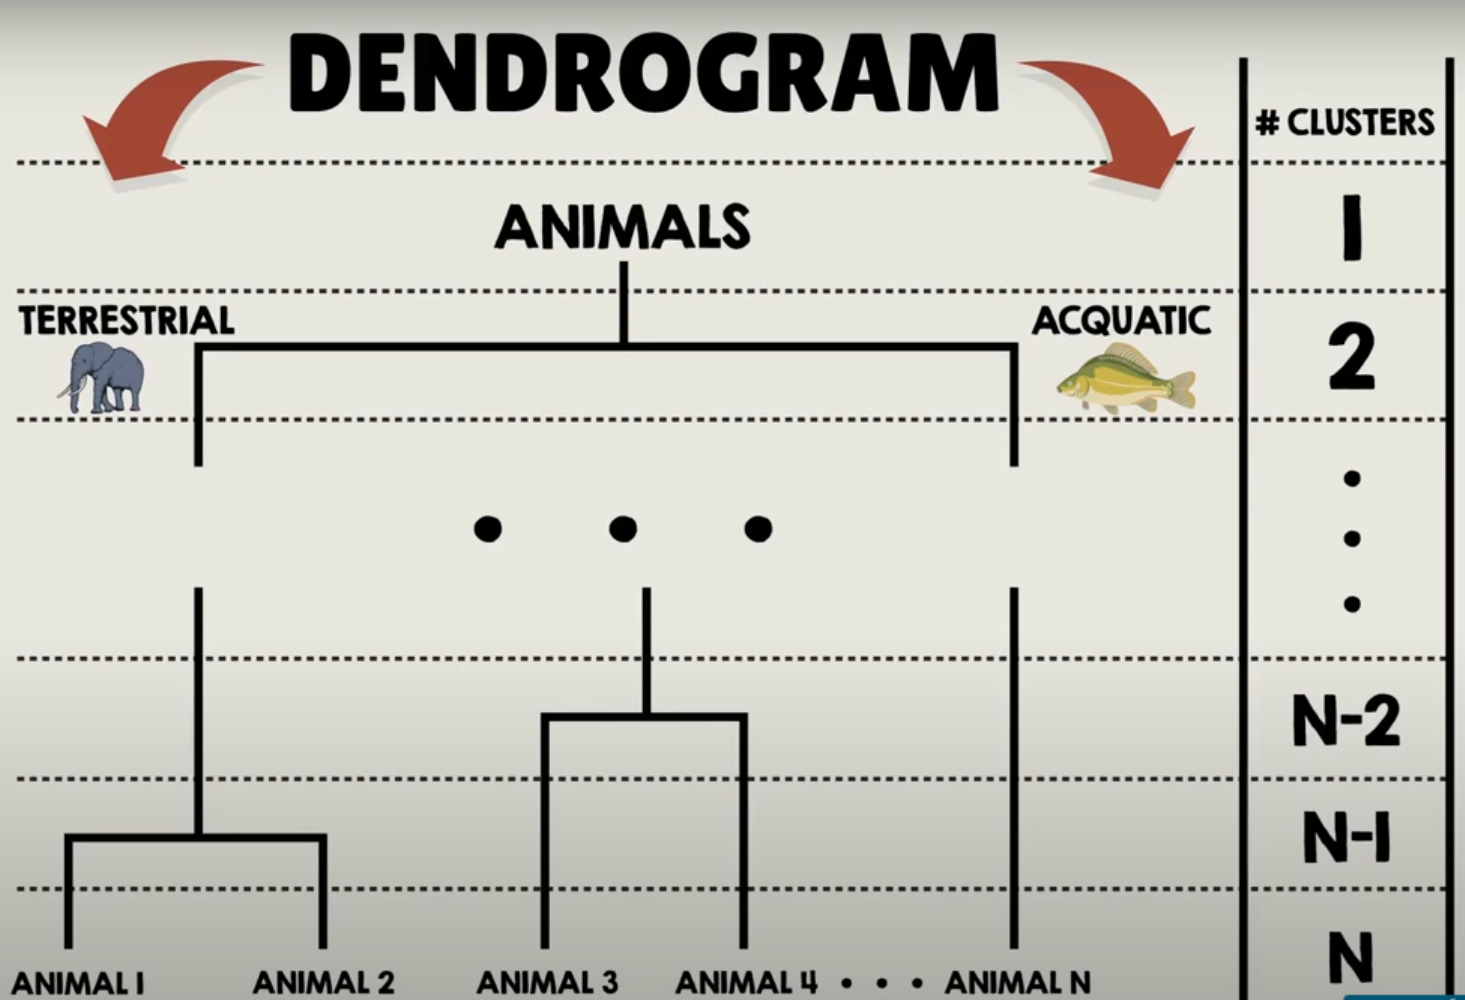
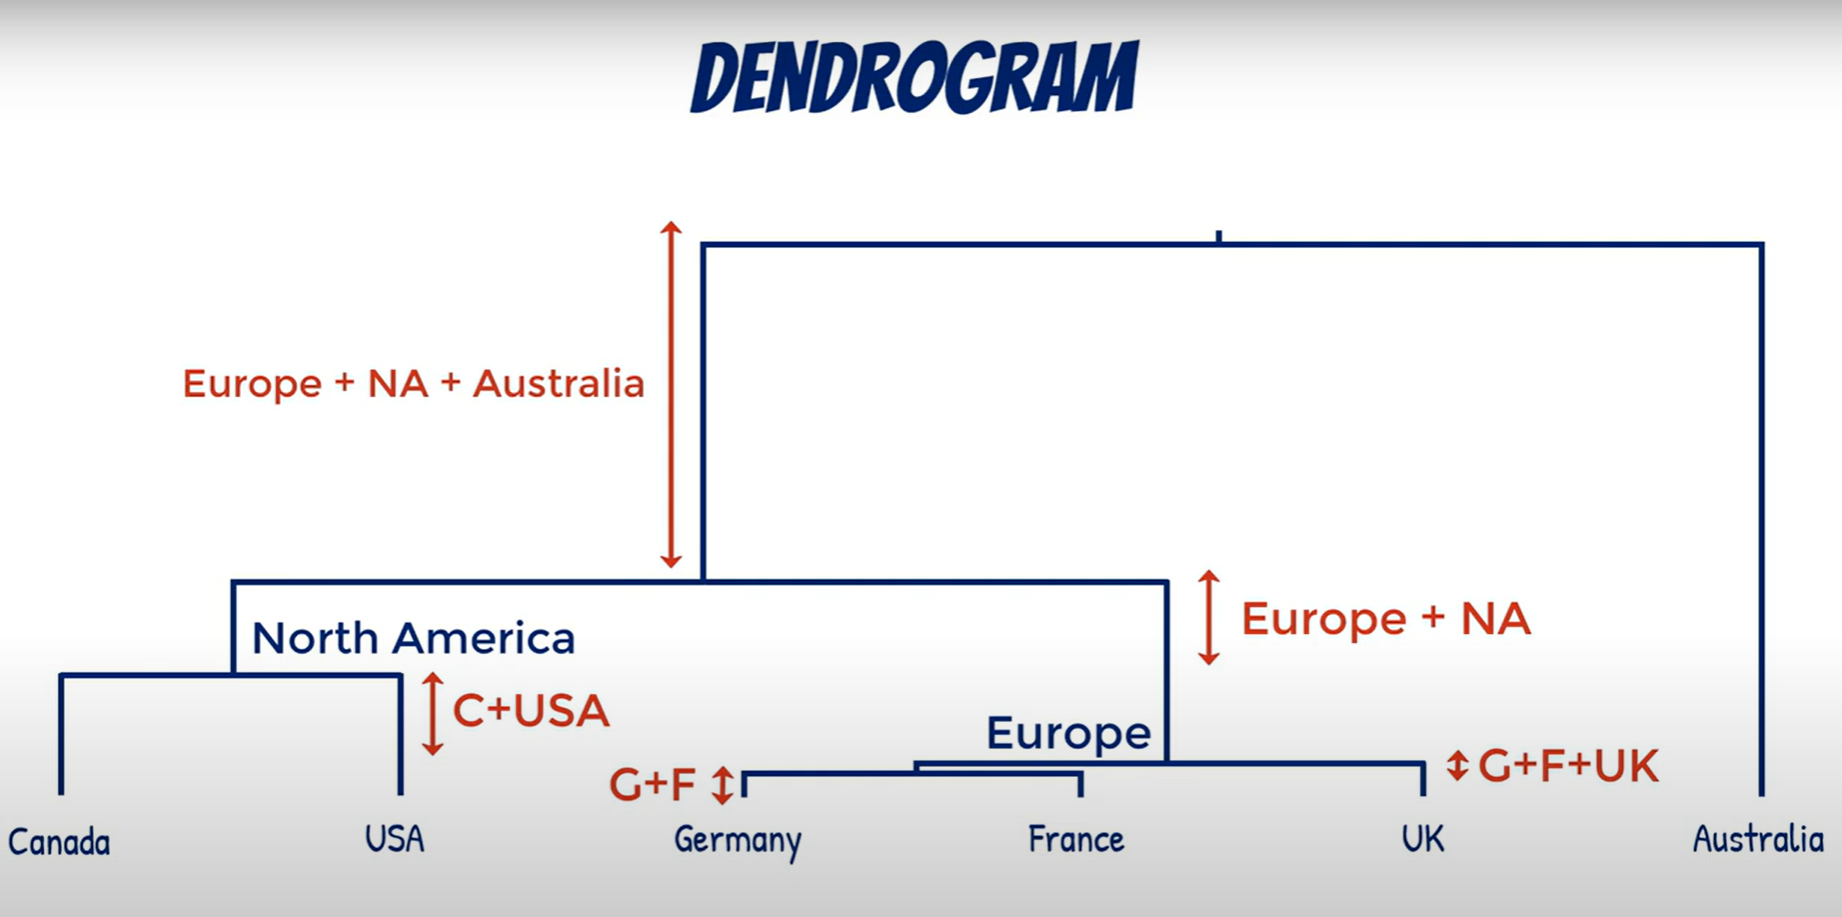
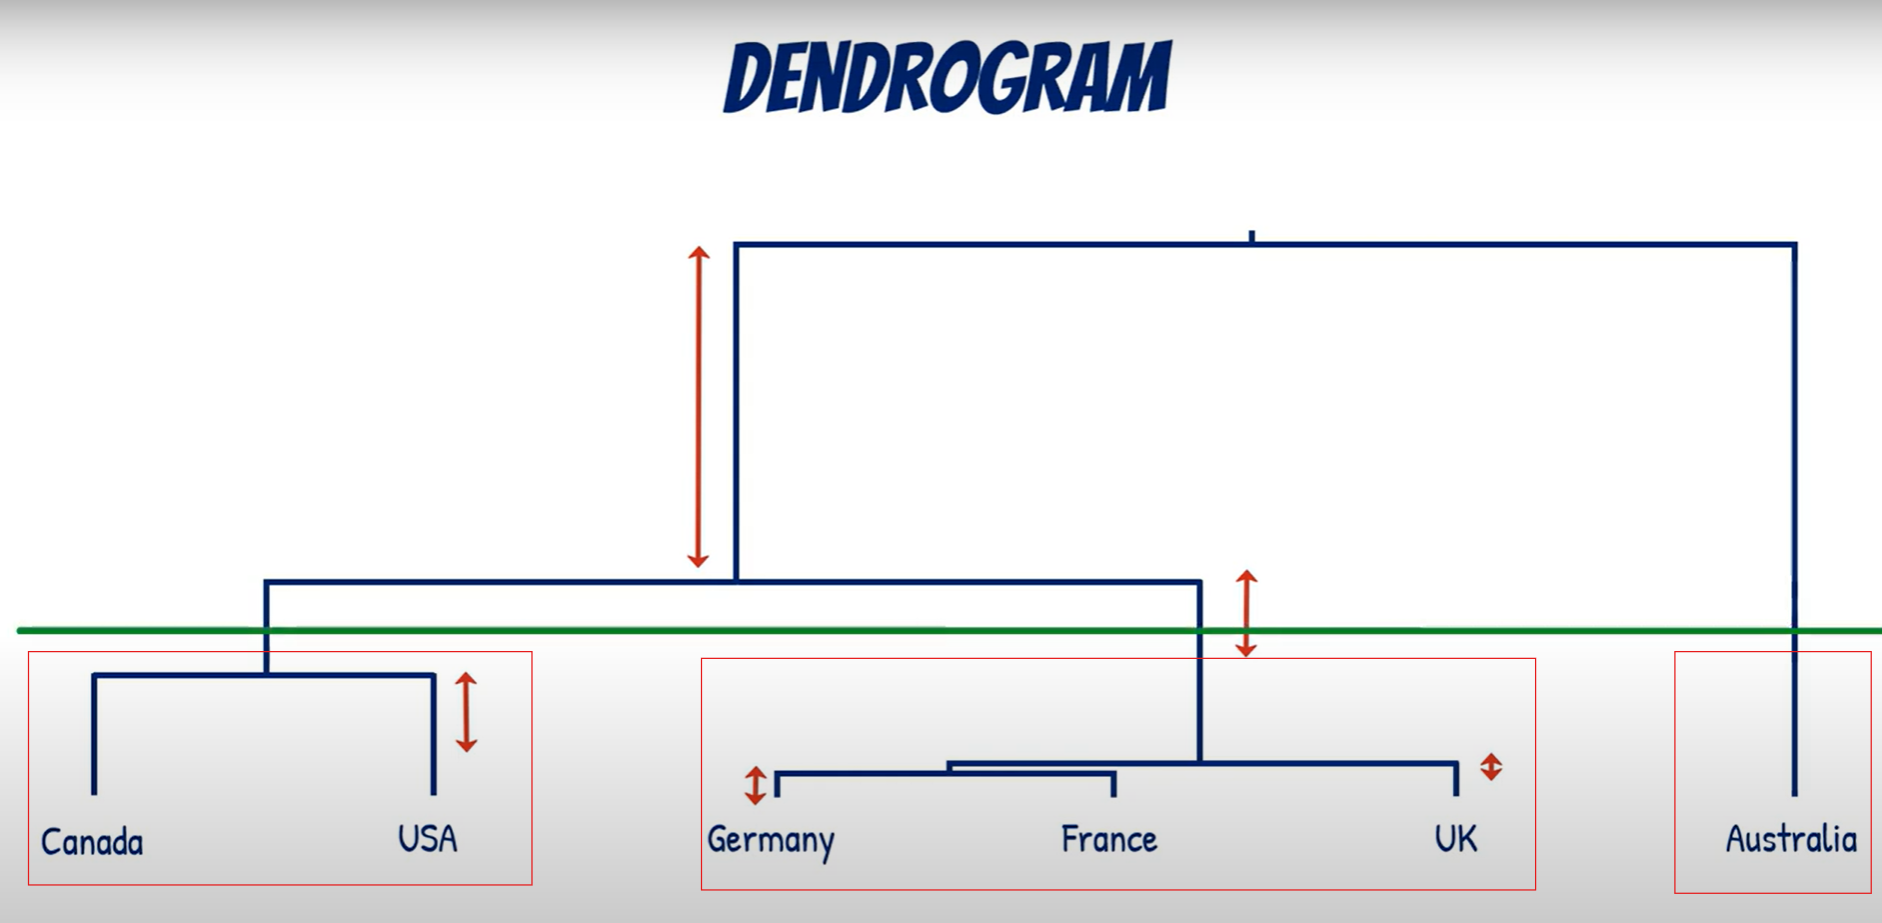

## Example: Country Clusters
__[K Means Clustering](https://www.youtube.com/watch?v=YIGtalP1mv0)__ <br>

- **Minimizaing** the distance between points in a cluster
    - `within-cluster sum of squares` (WCSS)
- **Maximizing** the distance between clusters

### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # set the style of all graphs to the seaborn
from sklearn.cluster import KMeans

### Load the data
__[Find Country's center in Decimal Degrees](https://www.latlong.net/)__
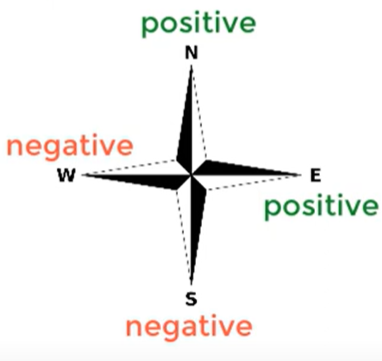

In [2]:
data = pd.read_csv("Country Clusters.csv") 

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

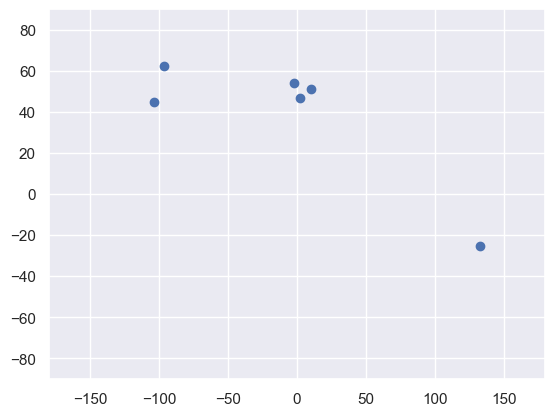

In [4]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

### Select the features

In [5]:
x = data.iloc[:, 1:3]
print(x)

   Latitude  Longitude
0     44.97    -103.77
1     62.40     -96.80
2     46.75       2.40
3     54.01      -2.53
4     51.15      10.40
5    -25.45     133.11


### Clustering

In [6]:
# Produce n clusters
kmeans = KMeans(3)

In [7]:
print(type(kmeans))

<class 'sklearn.cluster._kmeans.KMeans'>


In [8]:
# Apply k-means clustering with n clusters to x
kmeans.fit(x)

C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

### Clustering results

In [9]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 1, 1, 1, 0])

In [10]:
# Copy data from data
data_with_clusters = data.copy()

# Add new column to data_with_clusters
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


<function matplotlib.pyplot.show(close=None, block=None)>

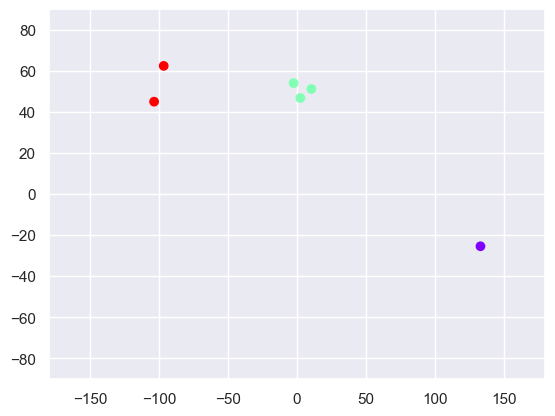

In [11]:
plt.scatter(
    data_with_clusters['Longitude'],
    data_with_clusters['Latitude'],
    c=data_with_clusters['Cluster'], # Set the color to be determine by variable
    cmap='rainbow' # Set color map
           )
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

---

In [12]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Map the data

In [13]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select the features

In [14]:
x = data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


### Clustering

In [15]:
kmeans = KMeans(3)

In [16]:
kmeans.fit(x)

C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

### Clustering results

In [17]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 0, 1, 0])

In [18]:
data_with_cluster = data_mapped.copy()
data_with_cluster['Cluster'] = identified_clusters
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

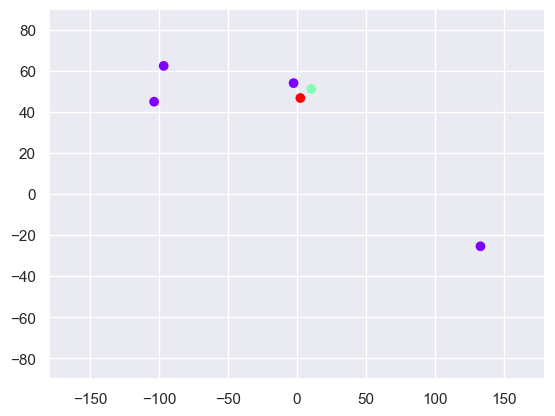

In [19]:
plt.scatter(
    data_with_cluster['Longitude'],
    data_with_cluster['Latitude'],
    c=data_with_cluster['Cluster'], # Set the color to be determine by variable
    cmap='rainbow' # Set color map
           )
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

---

### Select the features
- Longitude
- Latitude
- Language

In [20]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


### Clustering

In [21]:
kmeans = KMeans(3)

In [22]:
kmeans.fit(x)

C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

### Clustering results

In [23]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 2, 1])

In [24]:
data_with_cluster = data_mapped.copy()
data_with_cluster['Cluster'] = identified_clusters
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,2
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

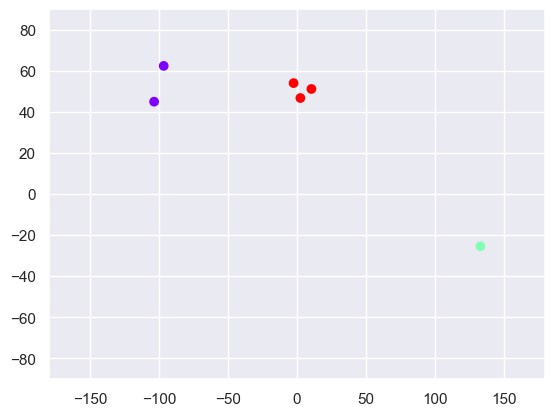

In [25]:
plt.scatter(
    data_with_cluster['Longitude'],
    data_with_cluster['Latitude'],
    c=data_with_cluster['Cluster'], # Set the color to be determine by variable
    cmap='rainbow' # Set color map
           )
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

### WCSS

In [26]:
kmeans.inertia_

290.10523333333333

In [27]:
wcss=[]

for i in range(1, len(data) + 1):
    kmeans = KMeans(i) # i: number of cluster
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\stgra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [28]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

### The Elbow Method

A **two cluster** solution would be **suboptmal** as the leap from 2 to 3 is very big.

Text(0, 0.5, 'Within-cluster Sum of Squares')

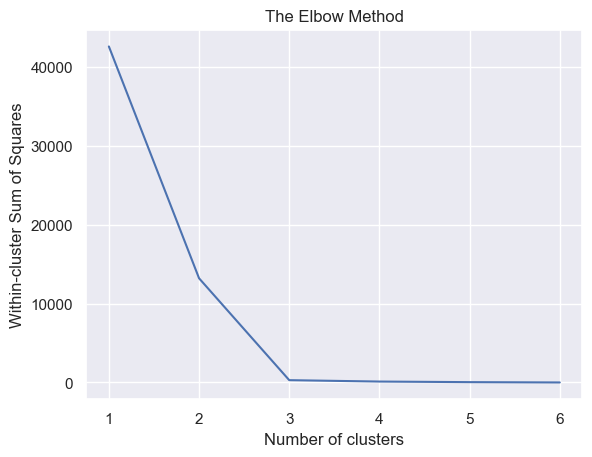

In [29]:
number_clusters = range(1, len(data) + 1)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')